In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.metrics import plot_confusion_matrix as PCM

In [89]:
data_heart = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Data analytics files\framingham_heart_disease.csv")
data_heart.head(50)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Statistical inference

In [90]:
data_heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# check for missing values and analysis it

In [91]:
data_heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [93]:
feature_nan = [feature for feature in data_heart.columns if data_heart[feature].isnull().sum() > 1]

for feature in feature_nan:
    print("{}: {}% missing values".format(feature,np.round(data_heart[feature].isnull().mean(),4)))

education: 0.0248% missing values
cigsPerDay: 0.0068% missing values
BPMeds: 0.0125% missing values
totChol: 0.0118% missing values
BMI: 0.0045% missing values
glucose: 0.0916% missing values


The advantage of below table shown is that the 'currentSmoker' column has value of 1 for all 'cigsPerDay' null values.
This helps in conveying that all missing values of cigsPerDay would not be zero

In [94]:
series  = pd.isnull(data_heart["cigsPerDay"])
data_heart[series]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
1046,0,49,1.0,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0
1292,1,42,3.0,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0
1347,0,58,4.0,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,NaN,0
1451,1,54,1.0,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1497,1,55,1.0,1,NaN,0.0,0,0,0,214.0,132.5,85.5,29.25,70.0,103.0,0
1610,0,61,1.0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
1625,0,49,2.0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0
1870,0,47,2.0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0


As Education does not play a factor in Heart Attack, I have dropped that column

In [95]:
data_heart = data_heart.drop(["education"],axis=1)
data_heart.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Filling NAN values with their respective column mean values

In [96]:
mean_cigsPerDay = round(data_heart["cigsPerDay"].mean())
mean_BPmeds = round(data_heart["BPMeds"].mean())
mean_totChol = round(data_heart["totChol"].mean())
mean_BMI = round(data_heart["BMI"].mean())
mean_glucose = round(data_heart["glucose"].mean())
mean_heartRate = round(data_heart["heartRate"].mean())

In [97]:
data_heart['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
data_heart['BPMeds'].fillna(mean_BPmeds, inplace = True)
data_heart['totChol'].fillna(mean_totChol, inplace = True)
data_heart['BMI'].fillna(mean_BMI, inplace = True)
data_heart['glucose'].fillna(mean_glucose, inplace = True)
data_heart['heartRate'].fillna(mean_heartRate, inplace = True)

In [98]:
feature_nan = [feature for feature in data_heart.columns if data_heart[feature].isnull().sum() > 1]

for feature in feature_nan:
    print("{}: {}% missing values".format(feature,np.round(data_heart[feature].isnull().mean(),4)))

In [99]:
data_heart.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [100]:
data_heart.groupby("TenYearCHD").mean()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,
0,0.410684,48.767668,0.489983,8.712577,0.023094,0.003895,0.275737,0.019199,235.193378,130.333612,82.160963,25.673826,75.762382,80.806066
1,0.532609,54.145963,0.517081,10.624224,0.063665,0.017081,0.504658,0.062112,245.271739,143.618789,86.981366,26.523199,76.529503,88.464286


Some Key Takeaways
1) Most of the Male has 10-year risk of developing coronary heart disease.

2) Most of the people having mean of age group 54.25 have high risk for developing coronary heart disease

3) Current Smoker have high high risk for developing coronary heart disease than non smokers

4) CigsPerDay, BPMeds, prevalentStroke, prevalentHyp are directly proportional with developing the risk for CHR

# EDA visualization

<AxesSubplot:>

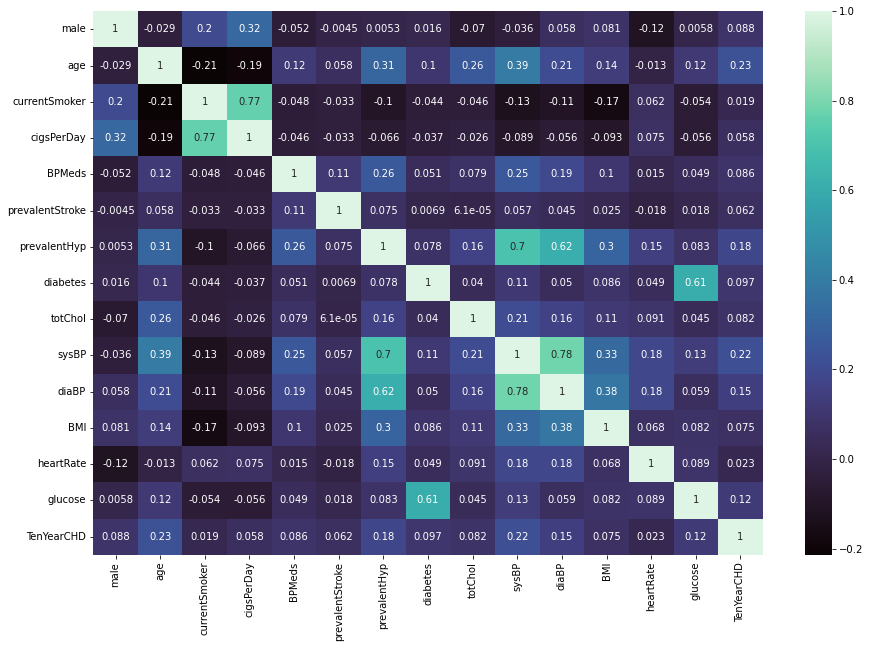

In [101]:
plt.figure(figsize=(15,10))
sns.heatmap(data_heart.corr(),annot=True,cmap="mako")

<AxesSubplot:ylabel='None'>

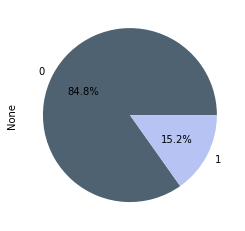

In [102]:
data_heart.groupby(["TenYearCHD"]).size().plot(kind="pie", autopct="%1.1f%%",colors=['#4F6272', '#B7C3F3'])

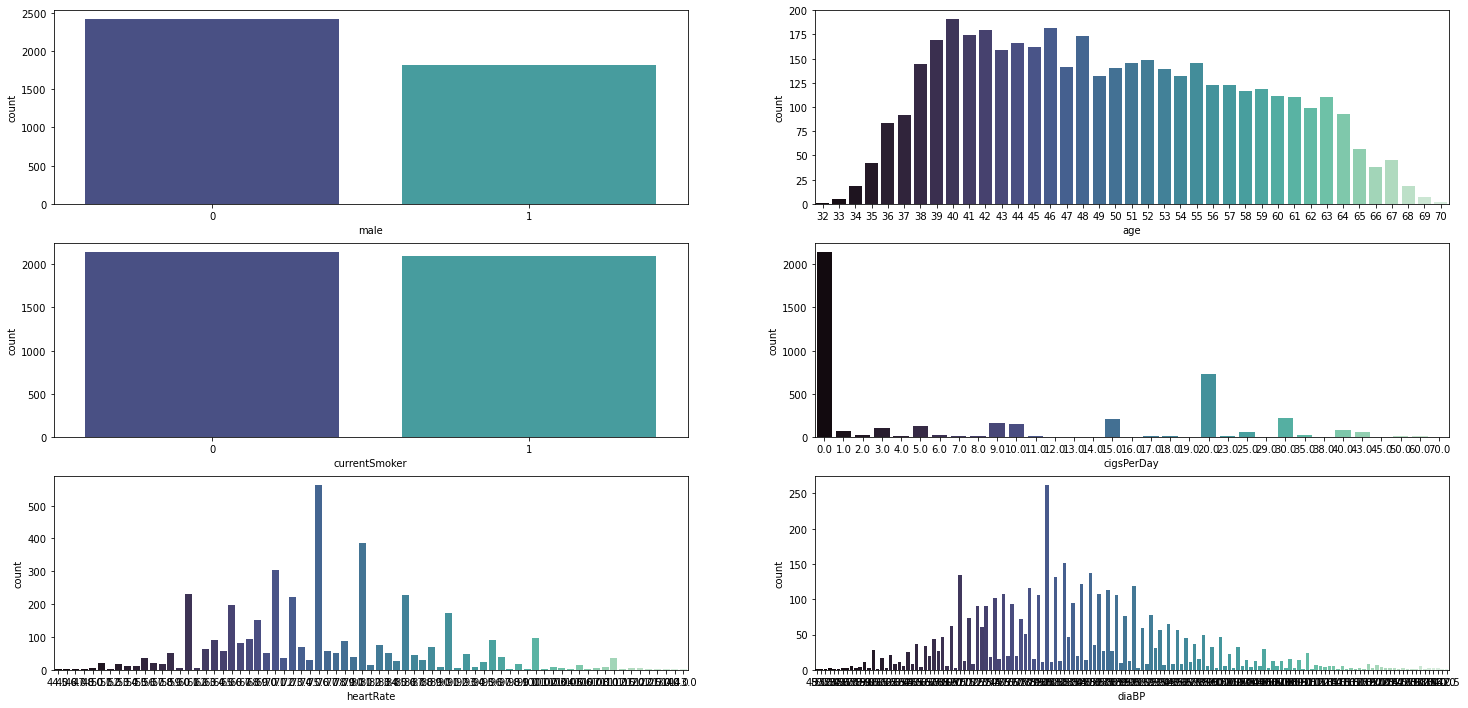

In [103]:
plt.figure(figsize=(25,25))

plt.subplot(6 ,2,1)
sns.countplot(x = 'male', palette='mako' , data=data_heart)

plt.subplot(6 ,2,2)
sns.countplot(x = 'age', palette='mako' , data=data_heart)

plt.subplot(6 ,2,3)
sns.countplot(x = 'currentSmoker', palette='mako' , data=data_heart)

plt.subplot(6 ,2,4)
sns.countplot(x = 'cigsPerDay', palette='mako' , data=data_heart)

plt.subplot(6 ,2,5)
sns.countplot(x = 'heartRate', palette='mako' , data=data_heart)

plt.subplot(6 ,2,6)
sns.countplot(x = 'diaBP', palette='mako' , data=data_heart)

plt.show()

# Pictorial Analysis

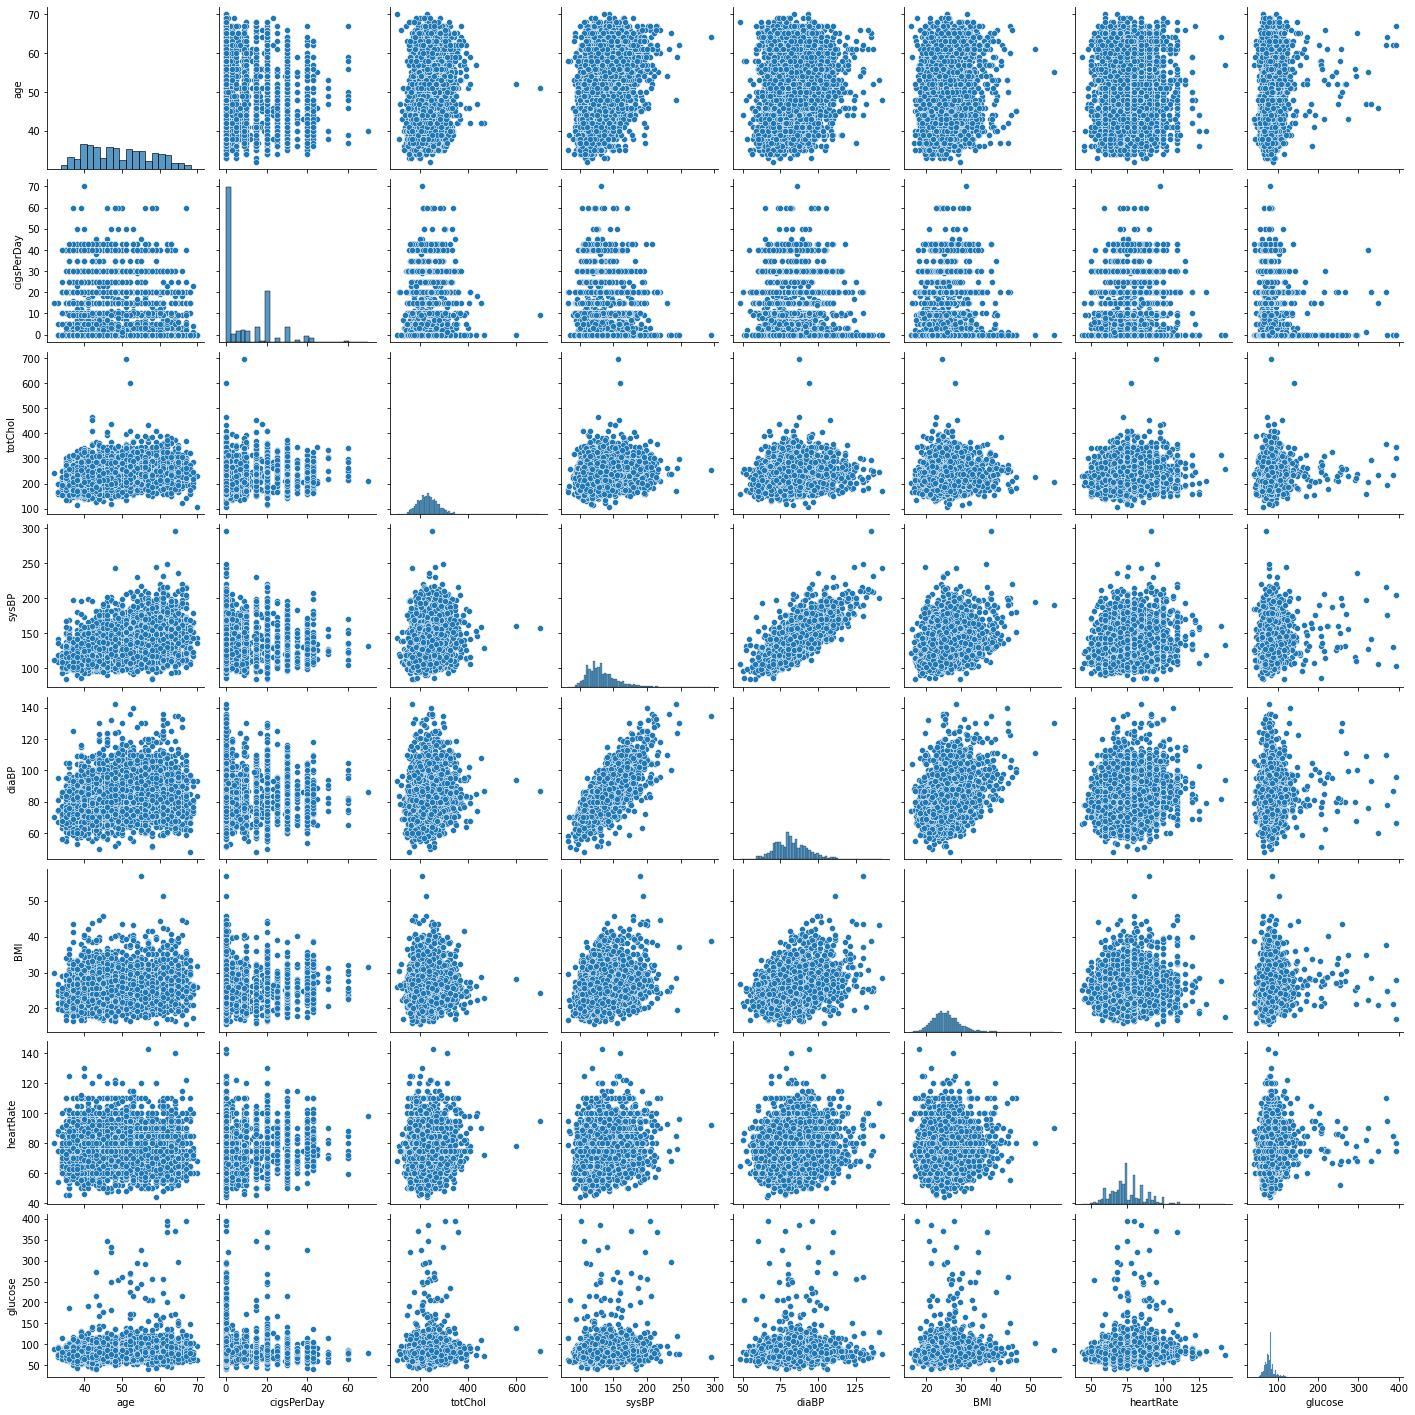

In [104]:
sns.pairplot(data_heart[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]])

# Normalization

In [105]:
cols_to_be_normalized = ["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
cols_not_to_be_normalized = ["male","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes","TenYearCHD"]

normalized = normalize(data_heart[cols_to_be_normalized])
boolean = data_heart[cols_not_to_be_normalized]

In [106]:
df_normalized = pd.DataFrame(normalized,columns = cols_to_be_normalized)
df_boolean = pd.DataFrame(boolean,columns=cols_not_to_be_normalized)
# df_final = pd.concat([df_normalized,df_boolean],axis = 1)
# df_final = df_normalized.join(df_boolean)
df_final = df_normalized.merge(df_boolean,left_index=True, right_index=True)

In [107]:
x = df_final.drop("TenYearCHD",axis=1)
y = df_final["TenYearCHD"]
x = np.array(x)
y = np.array(y)


#  Train Test Split

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.2)

In [109]:
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [110]:
y_pred = model.predict(x_test)

# Evaluating trained models

In [111]:
print("Accuracy for test accuracy : ",model.score(x_test,y_test))
print("Accuracy for train accuracy : ",model.score(x_train,y_train))

Accuracy for test accuracy :  0.8632075471698113
Accuracy for train accuracy :  0.8463126843657817


In [112]:
y_test_probab = model.predict_proba(x_test)
y_test_probab

array([[0.86163798, 0.13836202],
       [0.9257927 , 0.0742073 ],
       [0.92462541, 0.07537459],
       ...,
       [0.90114111, 0.09885889],
       [0.84694734, 0.15305266],
       [0.87502505, 0.12497495]])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

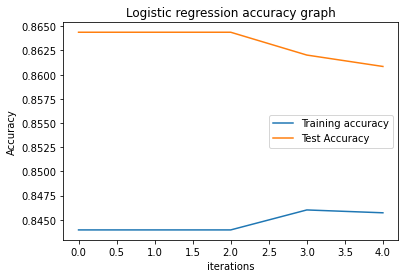

In [82]:
arr = (np.arange(5))
test_score = []
train_score = []

for i in arr:
    ml = LogisticRegression(solver='liblinear',max_iter=i)
    ml.fit(x_train,y_train)
    test_score.append(ml.score(x_test,y_test))
    train_score.append(ml.score(x_train,y_train))
    
plt.xlabel('iterations')
plt.ylabel('Accuracy')
plt.title('Logistic regression accuracy graph')
plt.plot(arr,train_score,label = 'Training accuracy')
plt.plot(arr,test_score,label = 'Test Accuracy')
plt.legend(loc = 'best')

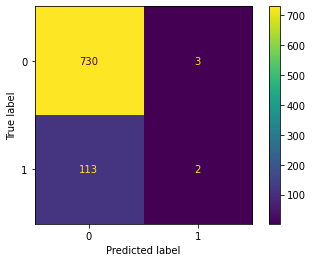

In [83]:
PCM(model,x_test,y_test)